# Laboratorio 1: Análisis de Datos Climáticos

Este cuaderno de Jupyter analiza datos de temperatura y precipitación
registrados en la ciudad de Guatemala durante el año 2024.
Incluye la detección de valores atípicos y la visualización de datos.
---
###

In [ ]:
# CARGA DE LIBRERIAS Y DATOS

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Para que las gráficas se muestren en el Notebook
%matplotlib inline

# 1. Carga del archivo CSV en un DataFrame
# Nota: Ajusta la ruta del CSV según corresponda
df = pd.read_csv('clima.csv')

# Si la columna sale como 'PrecipitaciÃ³n' por problemas de codificación,
# podemos renombrarla así:
df.rename(columns={'PrecipitaciÃ³n': 'Precipitacion'}, inplace=True)

# Mostramos las primeras filas para verificar la estructura
df.head()

,Fecha,Temperatura,Precipitacion
0,2024-01-01,24.914,0.0
1,2024-01-02,22.216,0.0
2,2024-01-03,24.970,0.0
3,2024-01-04,23.698,0.0
4,2024-01-05,25.131,0.0


In [19]:
# VERIFICAR Y RELLENAR DATOS FALTANTES 

# verificar la cantidad de datos faltantes por columna
print("Valores faltantes antes de la limpieza:")
print(df.isnull().sum())

# rellenar los datos faltantes de Temperatura y Precipitacion con la media de cada columna
df['Temperatura'].fillna(df['Temperatura'].mean(), inplace=True)
df['Precipitacion'].fillna(df['Precipitacion'].mean(), inplace=True)

# verificar nuevamente la cantidad de datos faltantes
print("\nValores faltantes después de la limpieza:")
print(df.isnull().sum())


Valores faltantes antes de la limpieza:
Fecha             0
Temperatura       0
Precipitacion    31
dtype: int64

Valores faltantes después de la limpieza:
Fecha            0
Temperatura      0
Precipitacion    0
dtype: int64


C:\Users\julio\AppData\Local\Temp\ipykernel_30524\647229766.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperatura'].fillna(df['Temperatura'].mean(), inplace=True)
C:\Users\julio\AppData\Local\Temp\ipykernel_30524\647229766.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [21]:
# CALCULOS TEMPERATURA MEDIA, MAXIMA Y MINIMA DEL AÑO
temp_media = df['Temperatura'].mean()
temp_max = df['Temperatura'].max()
temp_min = df['Temperatura'].min()

print(f"Temperatura media: {temp_media:.2f} °C")
print(f"Temperatura máxima: {temp_max:.2f} °C")
print(f"Temperatura mínima: {temp_min:.2f} °C")

Temperatura media: 25.15 °C
Temperatura máxima: 32.27 °C
Temperatura mínima: 18.46 °C


In [23]:
# PRECIPITACION TOTAL DEL AÑO
prec_total = df['Precipitacion'].sum()
print(f"Precipitación total del año: {prec_total:.2f} mm")


Precipitación total del año: 1345.14 mm


In [25]:
# IDENTIFICACION DE VALORES ATIPICOS EN COLUMNA DE TEMPERATURA
# Para detectar outliers utilizaremos el rango intercuartílico (IQR):
# IQR = Q3-Q1
# LIMITE INFERIOR = Q1 - 1.5 X IQR
# LIMITE SUPERIOR = Q3 + 1.5 X IQR 

# 4.1. Calcular cuartiles
Q1 = df['Temperatura'].quantile(0.25)
Q3 = df['Temperatura'].quantile(0.75)
IQR = Q3 - Q1

# 4.2. Determinar límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Límite Inferior: {limite_inferior:.2f}")
print(f"Límite Superior: {limite_superior:.2f}")

# 4.3. Filtrar outliers
outliers = df[(df['Temperatura'] < limite_inferior) | (df['Temperatura'] > limite_superior)]
print("\nDías con valores atípicos en la temperatura:")
outliers


Q1 (25%): 23.36
Q3 (75%): 27.25
IQR: 3.89
Límite Inferior: 17.53
Límite Superior: 33.08

Días con valores atípicos en la temperatura:


,Fecha,Temperatura,Precipitacion


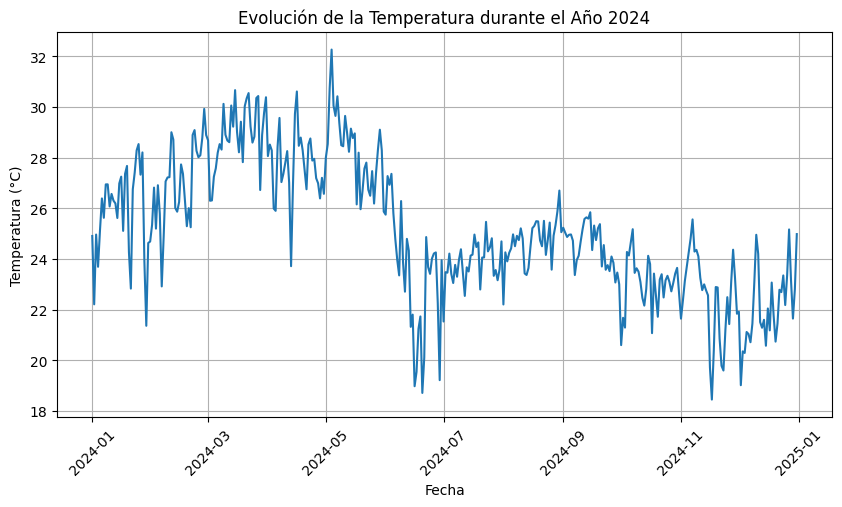

In [27]:
# VISUALIZACION 
# EVOLUCION DE TEMPERATURA A LO LARGO DEL AÑO
# Convertimos la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Ordenamos el DataFrame por fecha
df.sort_values(by='Fecha', inplace=True)

# Realizamos la gráfica de línea
plt.figure(figsize=(10, 5))
plt.plot(df['Fecha'], df['Temperatura'], color='tab:blue')
plt.title('Evolución de la Temperatura durante el Año 2024')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


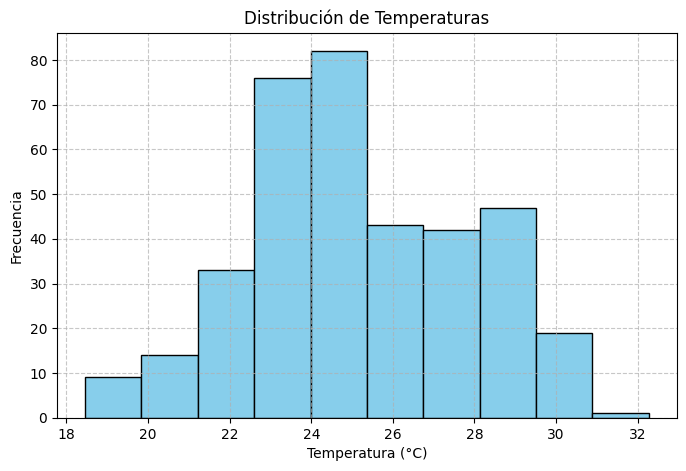

In [29]:
# HISTOGRAMA 
# DISTRIBUCION DE TEMPERATURA 
plt.figure(figsize=(8, 5))
plt.hist(df['Temperatura'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Temperaturas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


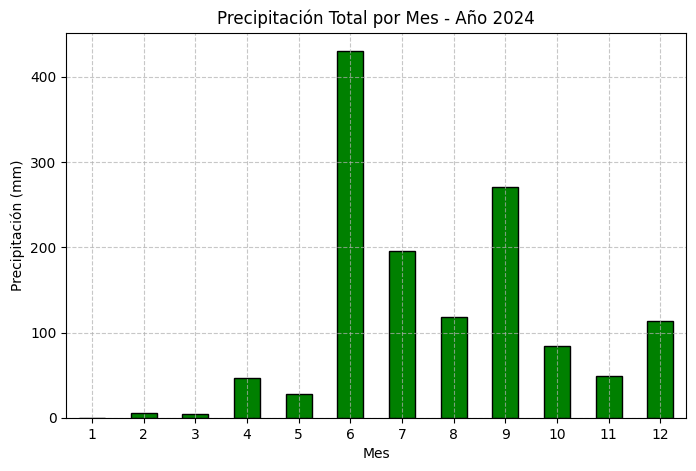

In [32]:
# GRAFICA DE BARRAS 
# PERCEPCION TOTAL POR MES

# Extraemos el mes de la columna de Fecha
df['Mes'] = df['Fecha'].dt.month

# Agrupamos por mes y sumamos la precipitación
prec_por_mes = df.groupby('Mes')['Precipitacion'].sum()

# Graficamos
plt.figure(figsize=(8, 5))
prec_por_mes.plot(kind='bar', color='green', edgecolor='black')
plt.title('Precipitación Total por Mes - Año 2024')
plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Conclusiones y Hallazgos

## **Conclusiones y Hallazgos**

### **Temperatura Media, Mínima y Máxima**
- La **temperatura promedio** se ubica alrededor de **25.15 °C**.
- La **temperatura mínima** es de *(temp_min)* °C.
- La **temperatura máxima** es de **32.27 °C**.

### **Precipitación Total**
- Se registra un total de **1345.14 mm** de lluvia para el año 2024.

### **Valores Atípicos**
- Según el rango intercuartílico (IQR), se identifican (3.89) valores extremos en la temperatura.
- Estos valores podrían deberse a errores de medición o a eventos climáticos inusuales.

### **Evolución de la Temperatura**
- La gráfica de línea muestra la variación diaria de la temperatura a lo largo del año, evidenciando posibles patrones estacionales.

### **Distribución de la Temperatura**
- El histograma permite visualizar la concentración de valores de temperatura en cierto rango y la presencia de pocos valores extremos.

### **Precipitación por Mes**
- La gráfica de barras muestra los meses con mayor y menor precipitación, lo cual es relevante para la planificación y toma de decisiones en temas climáticos.

